<a href="https://colab.research.google.com/github/Aayu0710/Data-Science-ML/blob/main/TensorFlow_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensor-Bascially a data point ot it is generalization of vector in higer dimensions.
Each tensor have a data type and a shape
Tensor are the main aspects of tensorFlow
TensorFlow works by building the graps of tensor objects.
Data type - int, float, string, double
Shape - Dimensions of the data type

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
string = tf.Variable("THis is a string", tf.string)
number = tf.Variable(123, int)


Rank/Degree of tensor->
Simply they are the number of dimensions include in the tensor

In [ ]:
rank1_tensor = tf.Variable(["test"], tf.string)
rank2_tensor = tf.Variable([["test", "ok"], ["test", "yes"]], tf.string)
tf.rank(rank1_tensor)

<tf.Tensor 'Rank_1:0' shape=() dtype=int32>

Shape of the tensor->
Amount of element that exist in each dimensions

In [ ]:
rank2_tensor.shape
rank1_tensor.shape

TensorShape([Dimension(1)])

**Changing the shape**->


In [ ]:
tensor1 = tf.ones([1,2,3])
tensor2 = tf.reshape(tensor1, [2,3,1]) #haing 2 lists, each having 3 ele and each ele is 1
print(tensor2)


Tensor("Reshape_2:0", shape=(2, 3, 1), dtype=float32)


**Types of Tensor**:-


*   variables

*   constants
*   Placeholder


*  Sparse Tensor

Variable tensor is mutable but all other are immutable


In [ ]:
with tf.Session() as sess:
   #creates the session using the default graph
   tensor1.eval()



In [ ]:
#lets do everything at one pace
%tensorflow_version 1.x
import tensorflow as tf
t1 = tf.ones([5,5,5,5])
t = tf.reshape(t1, [125, -1])
print(t)

Tensor("Reshape_3:0", shape=(125, 5), dtype=float32)


The core learning algo for TensorFlow
We will se the ***4 ML algo***
Each algo is aplly for the unique problem and datasets.



*   Linear Regression
*  Classification


*   clustering
*  Hidden markov model





***Linear Regression***
Most baisc forms of ML and used to predict the numeric values.
Data have linear corrospondace


(0.0, 6.0, 0.0, 20.0)

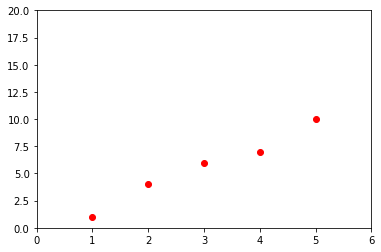

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = [1,2,3,4,5]
y=[1,4,6,7,10]
plt.plot(x,y,'ro')
plt.axis([0,6,0,20])

Setup and imports:
we need to install sklearn and importing the modules

In [ ]:
!pip install -q sklearn

In [ ]:
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
from __future__ import absolute_import, division, print_function,unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf
 

Dataset-
for the linear regression we will be using the expample of titanic data set.
1st step is to understand and explore the data.

In [ ]:
#load the dataset
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') #training model
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') #test model
print(dftrain.head()) #shows the first 5 entries in dataset
y_train = dftrain.pop('survived') #it takes the col. names survied and saved it in y_train
y_eval = dfeval.pop('survived') #same thing for testing data
print(dftrain.head())
print(y_train)
print(dftrain.loc[0], y_train[0]) #if we wants a particular row to be print out

   survived     sex   age  ...     deck  embark_town  alone
0         0    male  22.0  ...  unknown  Southampton      n
1         1  female  38.0  ...        C    Cherbourg      n
2         1  female  26.0  ...  unknown  Southampton      y
3         1  female  35.0  ...        C  Southampton      n
4         0    male  28.0  ...  unknown   Queenstown      y

[5 rows x 10 columns]
      sex   age  n_siblings_spouses  parch  ...  class     deck  embark_town alone
0    male  22.0                   1      0  ...  Third  unknown  Southampton     n
1  female  38.0                   1      0  ...  First        C    Cherbourg     n
2  female  26.0                   0      0  ...  Third  unknown  Southampton     y
3  female  35.0                   1      0  ...  First        C  Southampton     n
4    male  28.0                   0      0  ...  Third  unknown   Queenstown     y

[5 rows x 9 columns]
0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    

In [ ]:
dftrain.head() #by default gives the first 5 rows or entries

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
dftrain.describe() #gives the some basic information

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [ ]:
dftrain.shape

(627, 9)

In [ ]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

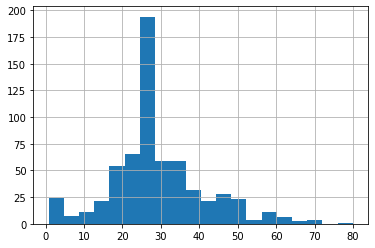

In [ ]:
#we will be drawing some graphs now as we have undertand the data 
#now we can corealte the dataset with each factors and labels
dftrain.age.hist(bins=20) #histogram

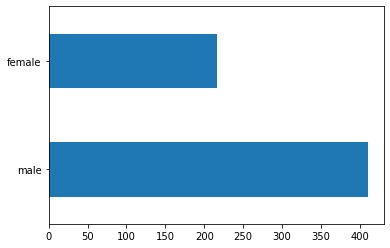

In [ ]:
dftrain.sex.value_counts().plot(kind='barh')

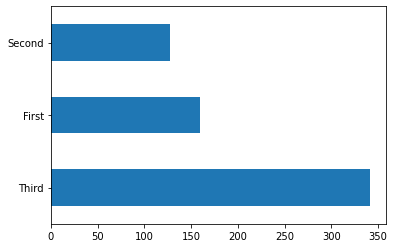

In [ ]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survived')

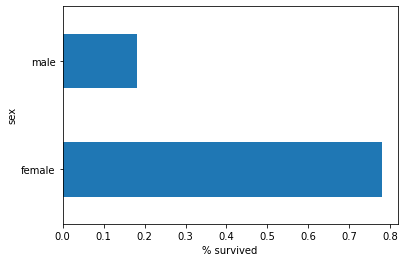

In [ ]:
pd.concat([dftrain,y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survived')

Text(0.5, 0, '% survived')

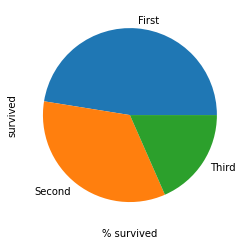

In [ ]:
pd.concat([dftrain,y_train], axis=1).groupby('class').survived.mean().plot(kind='pie').set_xlabel('% survived')

Our analysis of data


1.   Most of the passanger were of age between 20 and 30 
2.  Number of males are more than female

1.  Number of prople in third class are more.
2.   NUmber of female survied are more

1.  number of people survied in 1st class are more






In [ ]:
#we will be going towards the testing and training the data set
from __future__ import absolute_import, division, print_function,unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') #training model
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') #test model
y_train = dftrain.pop('survived') #it takes the col. names survied and saved it in y_train
y_eval = dfeval.pop('survived') #same thing for testing data

#CATEGORIAL data is a data which is not numeric
CATEGORIAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = [] #this we will be feeding in the LR model
for feature_name in CATEGORIAL_COLUMNS: 
  # we loop through in each feature name through categorial column
  vocabulary = dftrain[feature_name].unique() #gets the list of all unique values from given feature column 
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
  #print(feature_columns)
for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float32))
print(feature_columns)
  


[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [ ]:
#Next step is to building the model
# to make the model we need to train our data points from the dataset to the model also knows as traning process
# We need to feed the data into smaller batches like say of 32 
# We feed these data to our model in multiple times according to the number of epochs
#Epoch is simply one stream of our entire data set
#No. of epochs we define is the amount of time our model will see the entire dataset
# we use multiple epochs in hope that after seeing the same dataset multiple time we will have the better estimator
# say we have 10 epochs so our model will see the same data 10 times 


**Input Function**
The TensorFlow we are going to use required that data we pass it comes in s a tf.data.Dataset object. Therefore we need to create an input function which will convert our current pandas dataframe into that objects.

In [ ]:
#making input function
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df, label_ds)))
    #Above code will create the tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000) # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs) #splits the data set into batches and process for number of epochs
    return ds  #return the batch of dataset
  return input_function #return the function object for use

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# we just creats the linear estimator by passing the feature column we created earlier

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp0feljiyp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f689d944190>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
#Now we will be traing the dataset as we have crerated the object of our dataset and its ready to feed into the model
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    #Above code will create the tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000) # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs) #splits the data set into batches and process for number of epochs
    return ds  #return the batch of dataset
  return input_function #return the function object for use

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn) # train
result = linear_est.evaluate(eval_input_fn)  # get model mertics/stats by testing on testing daat
clear_output() #clear the console output
print(result['accuracy']) # the result is simply a dict of stats about our model


0.7689394
{'accuracy': 0.7689394, 'accuracy_baseline': 0.625, 'auc': 0.8411081, 'auc_precision_recall': 0.79614663, 'average_loss': 0.47161, 'label/mean': 0.375, 'loss': 13.833894, 'precision': 0.6826923, 'prediction/mean': 0.408786, 'recall': 0.7171717, 'global_step': 200}


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp6i2y0g63/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                          male
age                            34
n_siblings_spouses              0
parch                           0
fare                           13
class                      Second
deck                            D
embark_town           Southampton
alone                           y
Name: 4, dtype: object
1
0.2924244


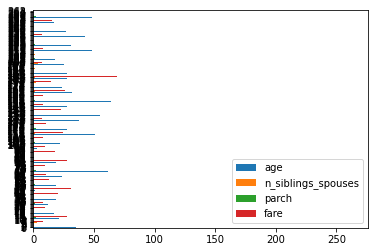

In [ ]:
result =list(linear_est.predict(eval_input_fn))
print(dfeval.loc[4])
print(y_eval.loc[4]) #gives the actual survial rate
print(result[4]['probabilities'][1]) #it gives the prob. of the survival at the index 1
dfeval.plot(kind='barh')